# PolynomialFeatures

In [2]:
# Import function to create training and test set splits
from sklearn.model_selection import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_absolute_error

import numpy as np

In [3]:
data = {"X": [0,1,2,3,4,5,6,7,8,9], "y": [2,6,7,7,4,3,2,2,3,11]}
df = pd.DataFrame(data=data)
df

,X,y
0,0,2
1,1,6
2,2,7
3,3,7
4,4,4
5,5,3
6,6,2
7,7,2
8,8,3
9,9,11


In [4]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(df['X'].values, df['y'].values, test_size=0.2)

In [5]:
X_train

array([1, 3, 0, 6, 5, 2, 7, 9], dtype=int64)

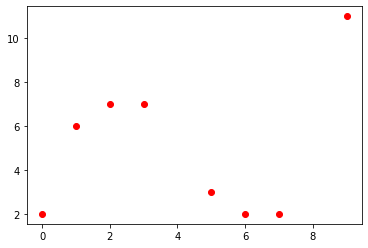

In [7]:
plt.scatter(X_train, y_train, color='red')

### Simple example:

[[  1.   1.   1.   1.]
 [  1.   3.   9.  27.]
 [  1.   0.   0.   0.]
 [  1.   6.  36. 216.]
 [  1.   5.  25. 125.]
 [  1.   2.   4.   8.]
 [  1.   7.  49. 343.]
 [  1.   9.  81. 729.]]
(8, 4)
y_pred (8,)
Score: 0.9964136299596509


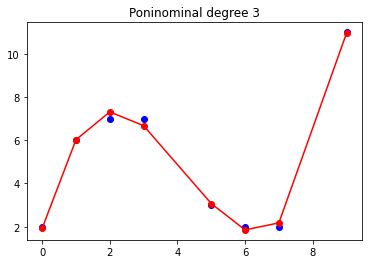

In [8]:
degree = 3

# Paso nº 1 - Llamamos a fit_transform 
# Calculamos las pendientes de nuestras Xn
polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1), y_train)

#######
print(X_poly)
print(X_poly.shape)

# Paso nº2
# Llamar a la regresión lineal entrenándola con la salida del fit_transform
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)

print("y_pred", y_pred.shape)
print("Score:", r2_score(y_train, y_pred))

X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='b')
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color='red')
plt.scatter(X_train_to_show, y_pred, color='red')
plt.title("Poninominal degree " + str(degree))
plt.show()

### **To predict**

In [11]:
X_test

array([8, 4], dtype=int64)

In [16]:
X_test_poly = polinominal_model.fit_transform(X_test.reshape(-1, 1))

y_test_pred = lin_reg_model.predict(X_test_poly)

print("X_test\n", X_test)
print("X_test_poly\n", X_test_poly)
print("y_test_pred\n", y_test_pred)

X_test
 [8 4]
X_test_poly
 [[  1.   8.  64. 512.]
 [  1.   4.  16.  64.]]
y_test_pred
 [4.9232922  4.96942882]


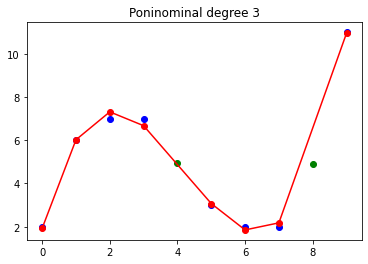

In [17]:
plt.scatter(X_train_to_show, y_train_to_show, color='b')
plt.plot(X_train_to_show, y_pred, color='red')
plt.scatter(X_train_to_show, y_pred, color='red')
plt.title("Poninominal degree " + str(degree))

plt.scatter(X_test, y_test_pred, color='green', label="X_test")

plt.show()

In [18]:
print("Score test:", r2_score(y_test, y_test_pred))

Score test: -8.277690247215636


In [12]:
y_test

array([4, 3], dtype=int64)

In [13]:
y_test_pred

array([218.36286504,  -5.84156028])

In [19]:
mean_absolute_error(y_true=y_test, y_pred=y_test_pred)

1.446360510674415

### Nice example

################
[[1.00000000e+00 9.29292929e+00 8.63585348e+01]
 [1.00000000e+00 1.81818182e+00 3.30578512e+00]
 [1.00000000e+00 8.38383838e+00 7.02887460e+01]
 [1.00000000e+00 2.82828283e+00 7.99918376e+00]
 [1.00000000e+00 4.94949495e+00 2.44975003e+01]
 [1.00000000e+00 3.33333333e+00 1.11111111e+01]
 [1.00000000e+00 4.34343434e+00 1.88654219e+01]
 [1.00000000e+00 3.03030303e+00 9.18273646e+00]
 [1.00000000e+00 3.93939394e+00 1.55188246e+01]
 [1.00000000e+00 5.55555556e+00 3.08641975e+01]
 [1.00000000e+00 1.41414141e+00 1.99979594e+00]
 [1.00000000e+00 1.51515152e+00 2.29568411e+00]
 [1.00000000e+00 5.45454545e+00 2.97520661e+01]
 [1.00000000e+00 3.53535354e+00 1.24987246e+01]
 [1.00000000e+00 4.74747475e+00 2.25385165e+01]
 [1.00000000e+00 7.87878788e+00 6.20752984e+01]
 [1.00000000e+00 1.11111111e+00 1.23456790e+00]
 [1.00000000e+00 9.09090909e-01 8.26446281e-01]
 [1.00000000e+00 7.07070707e+00 4.99948985e+01]
 [1.00000000e+00 2.72727273e+00 7.43801653e+00]
 [1.00000000e+00 5.1515

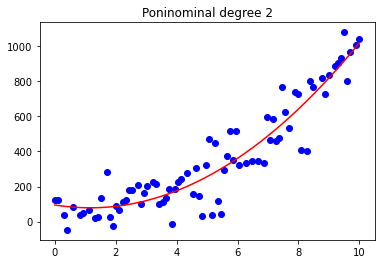

################
[[1.00000000e+00 9.29292929e+00 8.63585348e+01 8.02523758e+02]
 [1.00000000e+00 1.81818182e+00 3.30578512e+00 6.01051841e+00]
 [1.00000000e+00 8.38383838e+00 7.02887460e+01 5.89289487e+02]
 [1.00000000e+00 2.82828283e+00 7.99918376e+00 2.26239541e+01]
 [1.00000000e+00 4.94949495e+00 2.44975003e+01 1.21250254e+02]
 [1.00000000e+00 3.33333333e+00 1.11111111e+01 3.70370370e+01]
 [1.00000000e+00 4.34343434e+00 1.88654219e+01 8.19407214e+01]
 [1.00000000e+00 3.03030303e+00 9.18273646e+00 2.78264741e+01]
 [1.00000000e+00 3.93939394e+00 1.55188246e+01 6.11347636e+01]
 [1.00000000e+00 5.55555556e+00 3.08641975e+01 1.71467764e+02]
 [1.00000000e+00 1.41414141e+00 1.99979594e+00 2.82799426e+00]
 [1.00000000e+00 1.51515152e+00 2.29568411e+00 3.47830926e+00]
 [1.00000000e+00 5.45454545e+00 2.97520661e+01 1.62283997e+02]
 [1.00000000e+00 3.53535354e+00 1.24987246e+01 4.41874103e+01]
 [1.00000000e+00 4.74747475e+00 2.25385165e+01 1.07001038e+02]
 [1.00000000e+00 7.87878788e+00 6.2075

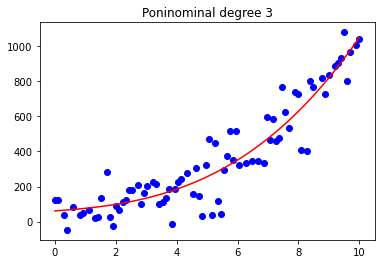

################
[[1.00000000e+00 9.29292929e+00 8.63585348e+01 8.02523758e+02
  7.45779654e+03]
 [1.00000000e+00 1.81818182e+00 3.30578512e+00 6.01051841e+00
  1.09282153e+01]
 [1.00000000e+00 8.38383838e+00 7.02887460e+01 5.89289487e+02
  4.94050782e+03]
 [1.00000000e+00 2.82828283e+00 7.99918376e+00 2.26239541e+01
  6.39869408e+01]
 [1.00000000e+00 4.94949495e+00 2.44975003e+01 1.21250254e+02
  6.00127519e+02]
 [1.00000000e+00 3.33333333e+00 1.11111111e+01 3.70370370e+01
  1.23456790e+02]
 [1.00000000e+00 4.34343434e+00 1.88654219e+01 8.19407214e+01
  3.55904143e+02]
 [1.00000000e+00 3.03030303e+00 9.18273646e+00 2.78264741e+01
  8.43226488e+01]
 [1.00000000e+00 3.93939394e+00 1.55188246e+01 6.11347636e+01
  2.40833917e+02]
 [1.00000000e+00 5.55555556e+00 3.08641975e+01 1.71467764e+02
  9.52598689e+02]
 [1.00000000e+00 1.41414141e+00 1.99979594e+00 2.82799426e+00
  3.99918380e+00]
 [1.00000000e+00 1.51515152e+00 2.29568411e+00 3.47830926e+00
  5.27016555e+00]
 [1.00000000e+00 5.4545

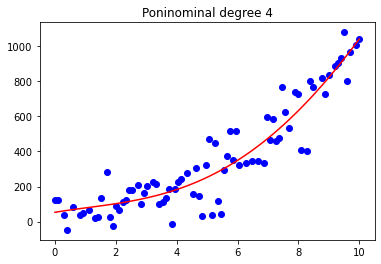

################
[[1.00000000e+00 9.29292929e+00 8.63585348e+01 8.02523758e+02
  7.45779654e+03 6.93047759e+04]
 [1.00000000e+00 1.81818182e+00 3.30578512e+00 6.01051841e+00
  1.09282153e+01 1.98694823e+01]
 [1.00000000e+00 8.38383838e+00 7.02887460e+01 5.89289487e+02
  4.94050782e+03 4.14204191e+04]
 [1.00000000e+00 2.82828283e+00 7.99918376e+00 2.26239541e+01
  6.39869408e+01 1.80973166e+02]
 [1.00000000e+00 4.94949495e+00 2.44975003e+01 1.21250254e+02
  6.00127519e+02 2.97032812e+03]
 [1.00000000e+00 3.33333333e+00 1.11111111e+01 3.70370370e+01
  1.23456790e+02 4.11522634e+02]
 [1.00000000e+00 4.34343434e+00 1.88654219e+01 8.19407214e+01
  3.55904143e+02 1.54584628e+03]
 [1.00000000e+00 3.03030303e+00 9.18273646e+00 2.78264741e+01
  8.43226488e+01 2.55523178e+02]
 [1.00000000e+00 3.93939394e+00 1.55188246e+01 6.11347636e+01
  2.40833917e+02 9.48739674e+02]
 [1.00000000e+00 5.55555556e+00 3.08641975e+01 1.71467764e+02
  9.52598689e+02 5.29221494e+03]
 [1.00000000e+00 1.41414141e+00 1

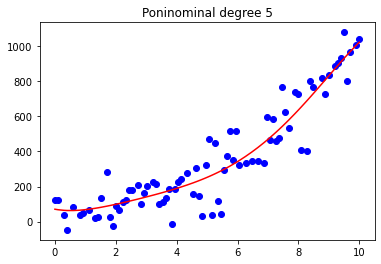

################
[[1.00000000e+00 9.29292929e+00 8.63585348e+01 8.02523758e+02
  7.45779654e+03 6.93047759e+04 6.44044382e+05]
 [1.00000000e+00 1.81818182e+00 3.30578512e+00 6.01051841e+00
  1.09282153e+01 1.98694823e+01 3.61263315e+01]
 [1.00000000e+00 8.38383838e+00 7.02887460e+01 5.89289487e+02
  4.94050782e+03 4.14204191e+04 3.47262100e+05]
 [1.00000000e+00 2.82828283e+00 7.99918376e+00 2.26239541e+01
  6.39869408e+01 1.80973166e+02 5.11843297e+02]
 [1.00000000e+00 4.94949495e+00 2.44975003e+01 1.21250254e+02
  6.00127519e+02 2.97032812e+03 1.47016240e+04]
 [1.00000000e+00 3.33333333e+00 1.11111111e+01 3.70370370e+01
  1.23456790e+02 4.11522634e+02 1.37174211e+03]
 [1.00000000e+00 4.34343434e+00 1.88654219e+01 8.19407214e+01
  3.55904143e+02 1.54584628e+03 6.71428182e+03]
 [1.00000000e+00 3.03030303e+00 9.18273646e+00 2.78264741e+01
  8.43226488e+01 2.55523178e+02 7.74312661e+02]
 [1.00000000e+00 3.93939394e+00 1.55188246e+01 6.11347636e+01
  2.40833917e+02 9.48739674e+02 3.7374593

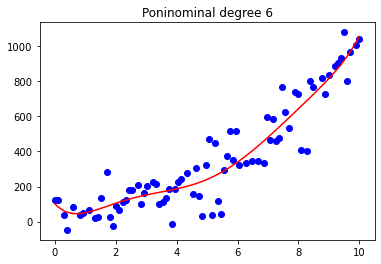

################
[[1.00000000e+00 9.29292929e+00 8.63585348e+01 8.02523758e+02
  7.45779654e+03 6.93047759e+04 6.44044382e+05 5.98505891e+06]
 [1.00000000e+00 1.81818182e+00 3.30578512e+00 6.01051841e+00
  1.09282153e+01 1.98694823e+01 3.61263315e+01 6.56842391e+01]
 [1.00000000e+00 8.38383838e+00 7.02887460e+01 5.89289487e+02
  4.94050782e+03 4.14204191e+04 3.47262100e+05 2.91138932e+06]
 [1.00000000e+00 2.82828283e+00 7.99918376e+00 2.26239541e+01
  6.39869408e+01 1.80973166e+02 5.11843297e+02 1.44763761e+03]
 [1.00000000e+00 4.94949495e+00 2.44975003e+01 1.21250254e+02
  6.00127519e+02 2.97032812e+03 1.47016240e+04 7.27656140e+04]
 [1.00000000e+00 3.33333333e+00 1.11111111e+01 3.70370370e+01
  1.23456790e+02 4.11522634e+02 1.37174211e+03 4.57247371e+03]
 [1.00000000e+00 4.34343434e+00 1.88654219e+01 8.19407214e+01
  3.55904143e+02 1.54584628e+03 6.71428182e+03 2.91630422e+04]
 [1.00000000e+00 3.03030303e+00 9.18273646e+00 2.78264741e+01
  8.43226488e+01 2.55523178e+02 7.74312661e+02

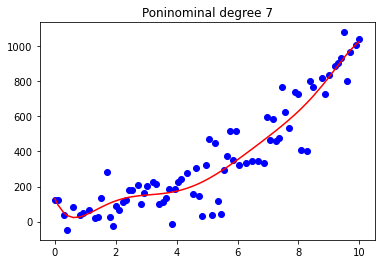

################
[[1.00000000e+00 9.29292929e+00 8.63585348e+01 8.02523758e+02
  7.45779654e+03 6.93047759e+04 6.44044382e+05 5.98505891e+06
  5.56187292e+07]
 [1.00000000e+00 1.81818182e+00 3.30578512e+00 6.01051841e+00
  1.09282153e+01 1.98694823e+01 3.61263315e+01 6.56842391e+01
  1.19425889e+02]
 [1.00000000e+00 8.38383838e+00 7.02887460e+01 5.89289487e+02
  4.94050782e+03 4.14204191e+04 3.47262100e+05 2.91138932e+06
  2.44086175e+07]
 [1.00000000e+00 2.82828283e+00 7.99918376e+00 2.26239541e+01
  6.39869408e+01 1.80973166e+02 5.11843297e+02 1.44763761e+03
  4.09432859e+03]
 [1.00000000e+00 4.94949495e+00 2.44975003e+01 1.21250254e+02
  6.00127519e+02 2.97032812e+03 1.47016240e+04 7.27656140e+04
  3.60153039e+05]
 [1.00000000e+00 3.33333333e+00 1.11111111e+01 3.70370370e+01
  1.23456790e+02 4.11522634e+02 1.37174211e+03 4.57247371e+03
  1.52415790e+04]
 [1.00000000e+00 4.34343434e+00 1.88654219e+01 8.19407214e+01
  3.55904143e+02 1.54584628e+03 6.71428182e+03 2.91630422e+04
  1.266

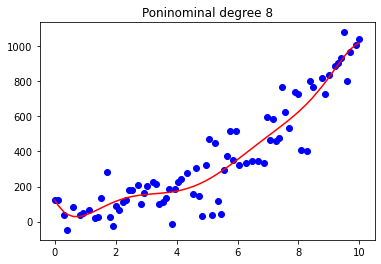

In [25]:
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 8
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1),y_train)

    #######
    print(X_poly)
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))
    print("MAE:", mean_absolute_error(y_true=y_train, y_pred=y_pred))
    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Poninominal degree " + str(degree))
    plt.show()
    input("Enter to next grade")

### Another nice example

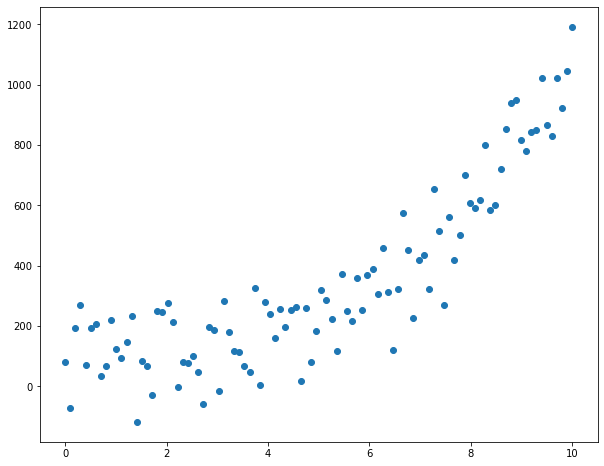

In [26]:
n_samples = 100
X = np.linspace(0, 10, 100)
y = X ** 3 + np.random.randn(n_samples) * 100 + 100
plt.figure(figsize=(10,8))
plt.scatter(X, y)

In [27]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

################
(80, 3)
y_pred (80,)
Score: 0.8579572809860527


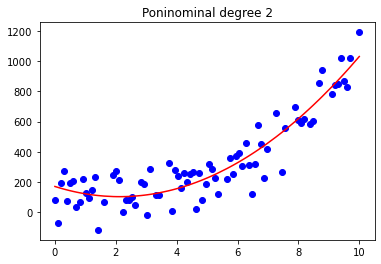

################
(80, 4)
y_pred (80,)
Score: 0.8662301709728043


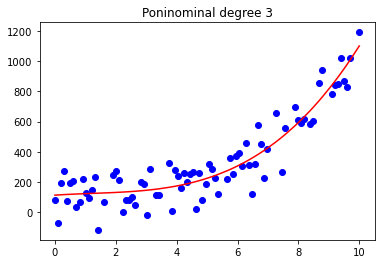

################
(80, 5)
y_pred (80,)
Score: 0.8662302064466401


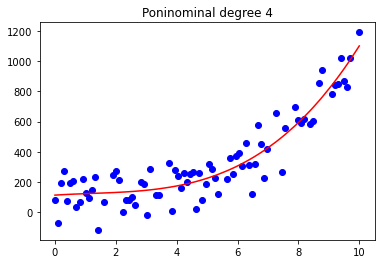

################
(80, 6)
y_pred (80,)
Score: 0.8663368901487315


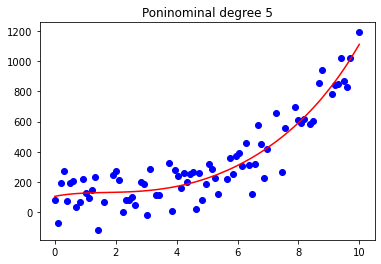

################
(80, 7)
y_pred (80,)
Score: 0.8663779379813356


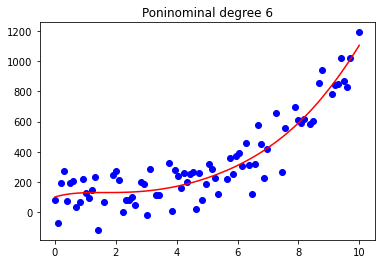

################
(80, 8)
y_pred (80,)
Score: 0.8692331805417411


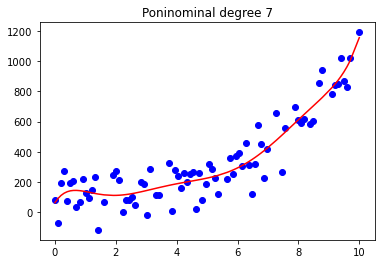

################
(80, 9)
y_pred (80,)
Score: 0.8692476630940782


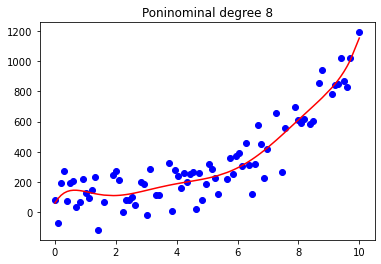

In [28]:
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 8
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
scores = []
for degree in range(degree_min,degree_max+1):
    print("################")
    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1),y_train)

    #######
    print(X_poly.shape)

    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_poly, y_train)
    y_pred = lin_reg_model.predict(X_poly)

    print("y_pred", y_pred.shape)
    print("Score:", r2_score(y_train, y_pred))

    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')
    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.title("Poninominal degree " + str(degree))
    plt.show()
    input("Enter to next grade")

## 2. Another

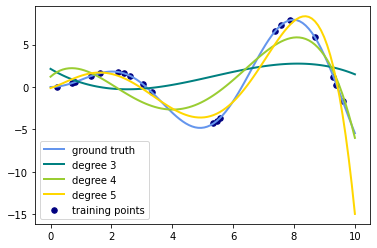

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()